# STEP 3: Training of the fold 1

In this section we are going to obtain a model for the fold 1 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Data Exploration

## Data Loading 

In [2]:
df = pd.read_csv('datasets/train_fold1.csv', index_col='MachineIdentifier')

## Data Description 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 181945 entries, 000061de7b3f42019db90eeb120ac3ac to 7fd57b472f0b7d5acb1bf0c5dd7a8ba0
Data columns (total 75 columns):
ProductName                                          181945 non-null object
EngineVersion                                        181945 non-null object
AppVersion                                           181945 non-null object
AvSigVersion                                         181945 non-null object
IsBeta                                               181945 non-null int64
RtpStateBitfield                                     181945 non-null float64
IsSxsPassiveMode                                     181945 non-null int64
AVProductStatesIdentifier                            181945 non-null float64
AVProductsInstalled                                  181945 non-null float64
AVProductsEnabled                                    181945 non-null float64
HasTpm                                               181945 non-null int64


In [4]:
df.head()

,ProductName,EngineVersion,AppVersion,AvSigVersion,IsBeta,RtpStateBitfield,IsSxsPassiveMode,AVProductStatesIdentifier,AVProductsInstalled,AVProductsEnabled,...,Census_FirmwareManufacturerIdentifier,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections
MachineIdentifier,,,,,,,,,,,,,,,,,,,,,
000061de7b3f42019db90eeb120ac3ac,win8defender,1.1.14800.3,4.14.17639.18041,1.267.1242.0,0,7.0,0,7945.0,2.0,1.0,...,628.0,8787.0,1,0.0,0,0,0.0,0.0,10.0,0
0000eb596d13fc67cfa8287a0a69f088,win8defender,1.1.14202.0,4.8.10240.17443,1.253.725.0,0,7.0,0,61343.0,2.0,1.0,...,556.0,13893.0,1,0.0,0,0,0.0,0.0,13.0,0
0000fdf6f3a37299d0f1ba4917a82c11,win8defender,1.1.14800.3,4.12.17007.18022,1.267.15.0,0,7.0,0,53447.0,1.0,1.0,...,554.0,33198.0,0,0.0,0,0,0.0,0.0,15.0,0
0001511435844fa9a3718b7a6dae0d22,win8defender,1.1.15000.2,4.13.17134.1,1.271.1003.0,0,7.0,0,62773.0,1.0,1.0,...,803.0,63140.0,0,0.0,0,0,0.0,0.0,12.0,0
0001b35aa123e6fbc38cf5d8198687a6,win8defender,1.1.15000.2,4.18.1806.18062,1.271.617.0,0,7.0,0,53447.0,1.0,1.0,...,628.0,26318.0,1,0.0,0,0,0.0,0.0,5.0,0


In [5]:
df.describe()

,IsBeta,RtpStateBitfield,IsSxsPassiveMode,AVProductStatesIdentifier,AVProductsInstalled,AVProductsEnabled,HasTpm,CountryIdentifier,CityIdentifier,OrganizationIdentifier,...,Census_FirmwareManufacturerIdentifier,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections
count,181945.0,181945.000000,181945.000000,181945.000000,181945.000000,181945.000000,181945.000000,181945.000000,181945.000000,181945.000000,...,181945.000000,181945.000000,181945.000000,181945.000000,181945.000000,181945.000000,181945.000000,181945.000000,181945.000000,181945.000000
mean,0.0,6.833851,0.013647,48028.081755,1.440688,1.026937,0.998813,106.475556,80269.206991,24.912803,...,434.515051,34613.675726,0.547979,0.001500,0.142444,0.030152,0.066822,0.123939,8.411866,0.341719
std,0.0,1.021289,0.116021,16248.534937,0.573032,0.194782,0.034435,62.207733,48915.353017,5.132549,...,219.627805,21211.279809,0.497694,0.038707,0.349506,0.171006,0.249715,0.329512,4.438819,0.474287
min,0.0,0.000000,0.000000,39.000000,1.000000,0.000000,0.000000,2.000000,7.000000,1.000000,...,11.000000,90.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.0,7.000000,0.000000,47238.000000,1.000000,1.000000,1.000000,51.000000,34809.000000,18.000000,...,142.000000,16750.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000
50%,0.0,7.000000,0.000000,53447.000000,1.000000,1.000000,1.000000,93.000000,82373.000000,27.000000,...,551.000000,33075.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,0.000000
75%,0.0,7.000000,0.000000,53447.000000,2.000000,1.000000,1.000000,159.000000,122701.000000,27.000000,...,556.000000,56954.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.000000,1.000000
max,0.0,8.000000,1.000000,70498.000000,5.000000,5.000000,1.000000,222.000000,167934.000000,52.000000,...,1083.000000,72102.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,15.000000,1.000000


## Splitting label information

In [6]:
df_y = df['HasDetections']
df.drop(labels=['HasDetections'], axis=1, inplace=True)

## Categorical to Numerical 

In [7]:
columns_categorical = df.select_dtypes(include=['object']).columns

In [8]:
total = 0
for c in columns_categorical:
    values = df[c].nunique()
    total += values
    print(str(c) + ': ' + str(values))
print('Total new vars: ' + str(total))

ProductName: 2
EngineVersion: 53
AppVersion: 87
AvSigVersion: 4798
Platform: 3
Processor: 2
OsVer: 7
OsPlatformSubRelease: 9
OsBuildLab: 282
SkuEdition: 7
SmartScreen: 10
Census_MDC2FormFactor: 10
Census_DeviceFamily: 1
Census_PrimaryDiskTypeName: 4
Census_ChassisTypeName: 27
Census_PowerPlatformRoleName: 9
Census_OSVersion: 250
Census_OSArchitecture: 2
Census_OSBranch: 13
Census_OSEdition: 14
Census_OSSkuName: 13
Census_OSInstallTypeName: 9
Census_OSWUAutoUpdateOptionsName: 5
Census_GenuineStateName: 4
Census_ActivationChannel: 5
Census_FlightRing: 7
Total new vars: 5633


There are some of the categorical values that have a lot of values .... 

In [9]:
df_num=pd.get_dummies(data=df,columns=columns_categorical)

In [10]:
#df_num.to_csv('datasets/train_reduced_num.csv')

# Dimensionality Reduction with PCA (with previous normalization)

In [11]:
#df_num= pd.read_csv('datasets/train_reduced_num.csv')

In [12]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

In [13]:
scaler = MinMaxScaler()

In [15]:
data_scaled = scaler.fit_transform(df_num.values)

In [19]:
pca = PCA()

In [ ]:
reduced = pca.fit_transform(data_scaled)

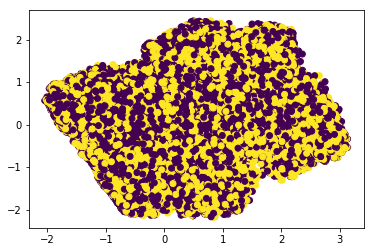

In [30]:
plt.scatter(reduced[:,0], reduced[:,1], c=df_y.values, alpha=1)

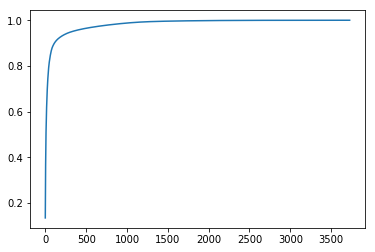

In [31]:
cumulative = []
last = 0
for v in pca.explained_variance_ratio_:
    cumulative.append(last + v)
    last = cumulative[-1]
plt.plot(cumulative)
#plt.xlim([0,7])

dimension can be reducced to k dimensions: 

In [32]:
keep_info=0.96
np_cumulative = np.array(cumulative)
k=(np_cumulative>keep_info).argmax()
print('k for 95% of information: ',k,'. compresion: ',1-(k/(reduced.shape[1])))

k for 95% of information:  431 . compresion:  0.884388412017


In [33]:
X_num_pca = reduced[:,0:k]

In [34]:
X_num_pca.shape

(201647, 431)

# Classification problem

In [36]:
import sys
sys.path.append('../../GitRepos/dsbase/src/main/')

from sklearn.model_selection import train_test_split
from ModelDSBase import ModelDSBaseWrapper

## Ada Boosting 

In [46]:
from AdaBoostClassificationDSBase import AdaBoostClassificationDSBaseModelParamsToMap
from AdaBoostClassificationDSBase import AdaBoostClassificationDSBaseModel

In [47]:
params = AdaBoostClassificationDSBaseModelParamsToMap(100,1.0)
abc = ModelDSBaseWrapper('AB',X_num_pca,df_y.values,[30,65,100],0.3,AdaBoostClassificationDSBaseModel,params,splitter=train_test_split)

X size:(201647, 431)
y size:(201647,)
initiating model AB0. AdaBoostClassification
initiating model AB1. AdaBoostClassification
initiating model AB2. AdaBoostClassification


In [48]:
abc.train()

training model AB0. AdaBoostClassification
training model AB1. AdaBoostClassification
training model AB2. AdaBoostClassification


In [49]:
lcabc = abc.getLearningCurves()

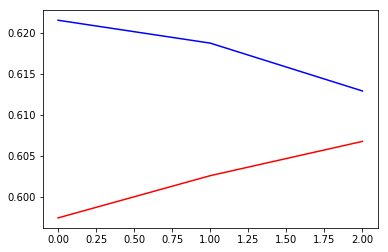

In [50]:
plt.plot(lcabc[0,:],'b',lcabc[1,:],'r')

In [51]:
abc.getScore()

0.606744359037937

## DDN 

In [ ]:
from DNNClassificationKerasDSBase import DNNClassificationKerasDSBaseParamsToMap
from DNNClassificationKerasDSBase import DNNClassificationKerasDSBaseModel

In [ ]:
params = DNNClassificationKerasDSBaseParamsToMap(layers=[200,100,50,20,10,5], alpha=1e-2, beta1=0.9, beta2=0.999, epsilon=1e-8, batch_size=128, epochs=40)
dnnkc = ModelDSBaseWrapper('DNNKC',X_num_pca,df_y.values,[70,75,80,85,90,95,100],0.3,DNNClassificationKerasDSBaseModel,params,splitter=train_test_split)

In [ ]:
dnnkc.train()

In [ ]:
lcdnnkc=dnnkc.getLearningCurves()

In [ ]:
plt.plot(lcdnnkc[0,:],'b',lcdnnkc[1,:],'r')

In [ ]:
dnnkc.getScore()